## Отчет о проделанной работе в контесте по классификации

Загружаем данные

In [ ]:
import pandas as pd

Разделяем выборку на X, y

In [157]:
train = pd.read_csv('train.csv', sep=',')
y = train['target']
X = train.drop(columns=['target'])
X.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,0.00,3.51,0.04,0.0,2.39,203.0,7.95,23.71,124.00,143,148,1,2
1,0.27,8.18,3.27,6.0,4.17,108.0,10.24,14.84,83.42,135,203,1,1
2,0.34,5.32,0.07,2.0,4.06,77.0,24.20,15.80,66.29,115,35,3,2
3,NaN,2.77,2.20,7.0,3.34,134.0,7.23,9.56,92.35,169,181,3,3
4,0.62,3.97,2.92,7.0,5.30,25.0,17.80,11.71,33.09,168,51,2,2


Сначала изучим признаки

In [158]:
X.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
count,981.000000,1000.000000,982.000000,978.000000,983.000000,893.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.495341,5.087420,2.462108,3.483640,4.979074,111.125420,14.742180,14.862880,80.506380,112.374000,109.954000,1.703000,2.105000
std,0.291720,2.834132,1.462664,2.297308,1.479980,58.320746,5.720165,5.843719,29.346648,57.286612,58.673883,0.785753,0.711675
min,0.000000,0.000000,0.000000,0.000000,2.060000,10.000000,5.040000,5.050000,25.770000,10.000000,10.000000,1.000000,1.000000
25%,0.230000,2.665000,1.152500,1.000000,3.675000,61.000000,9.577500,9.775000,55.602500,65.000000,60.000000,1.000000,2.000000
50%,0.500000,5.130000,2.465000,3.000000,4.970000,113.000000,14.825000,14.760000,81.915000,113.000000,109.000000,1.000000,2.000000
75%,0.740000,7.510000,3.670000,5.000000,6.230000,162.000000,19.572500,19.990000,105.987500,162.000000,161.000000,2.000000,3.000000
max,1.000000,9.990000,5.000000,7.000000,7.940000,207.000000,24.990000,24.970000,133.440000,209.000000,209.000000,3.000000,3.000000


Немного поисследовал распределение фичей

In [229]:
import numpy as np

for column in X.columns:
    print(np.unique(X[column], return_counts=True))

(array([0.        , 0.01      , 0.02      , 0.03      , 0.04      ,
       0.05      , 0.06      , 0.07      , 0.08      , 0.09      ,
       0.1       , 0.11      , 0.12      , 0.13      , 0.14      ,
       0.15      , 0.16      , 0.17      , 0.18      , 0.19      ,
       0.2       , 0.21      , 0.22      , 0.23      , 0.24      ,
       0.25      , 0.26      , 0.27      , 0.28      , 0.29      ,
       0.3       , 0.31      , 0.32      , 0.33      , 0.34      ,
       0.35      , 0.36      , 0.37      , 0.38      , 0.39      ,
       0.4       , 0.41      , 0.42      , 0.43      , 0.44      ,
       0.45      , 0.46      , 0.47      , 0.48      , 0.49      ,
       0.49534149, 0.5       , 0.51      , 0.52      , 0.53      ,
       0.54      , 0.55      , 0.56      , 0.57      , 0.58      ,
       0.59      , 0.6       , 0.61      , 0.62      , 0.63      ,
       0.64      , 0.65      , 0.66      , 0.67      , 0.68      ,
       0.69      , 0.7       , 0.71      , 0.72      , 0.73  

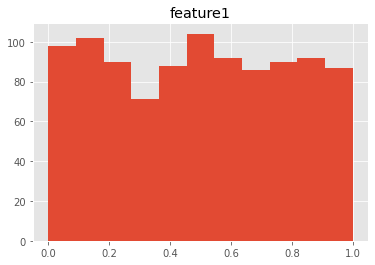

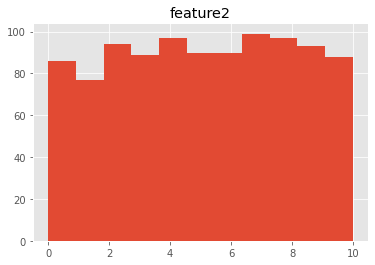

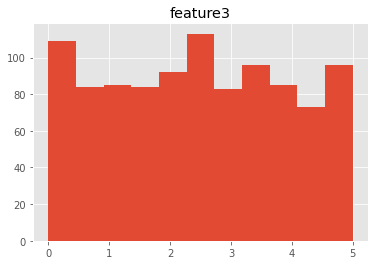

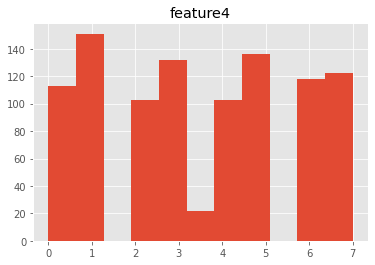

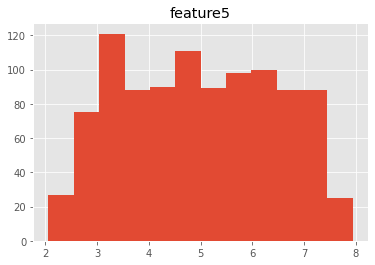

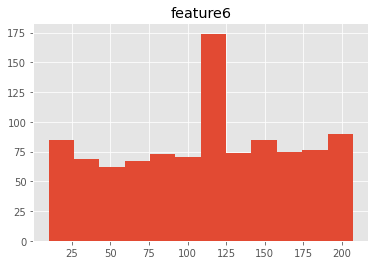

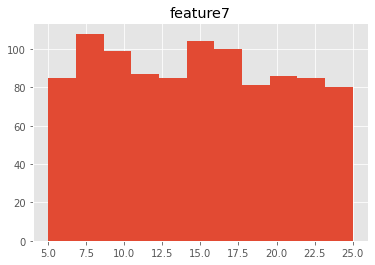

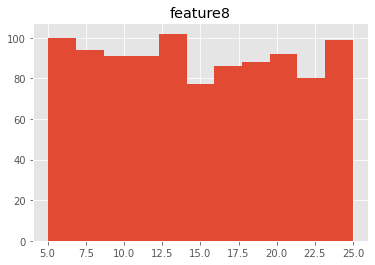

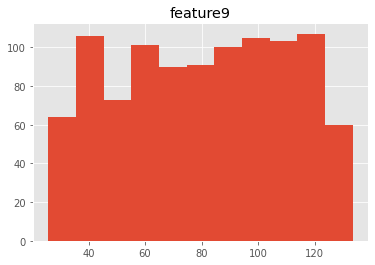

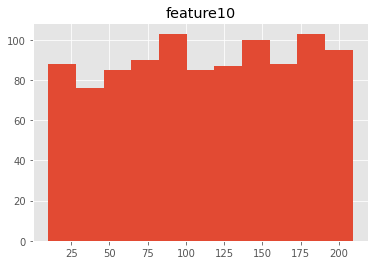

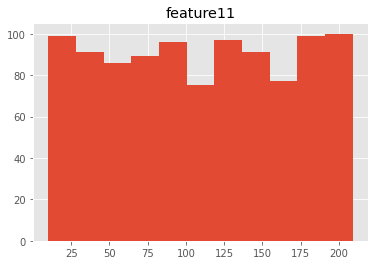

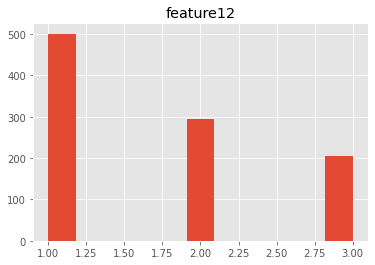

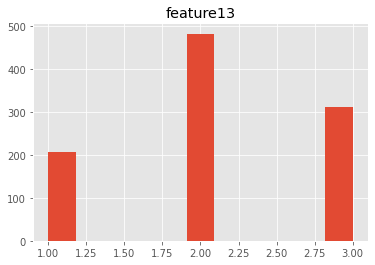

In [237]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for column in X.columns:
    plt.title(f'{column}')
    X[column].hist(bins='auto')
    plt.show()

Видим, что значения более менее равномерно распределены (хотя в некоторых фичах есть аномалии, например, в 6 фиче есть явный пик, возможно, там не очень разумно заполнять средним из-за этого пика)

Некоторые фичи сосредоточены около определенных значений (12 и 13, например)

4ю фичу разумнее заполнять ffill

Я попробовал разные комбинции, но обычно заполнял все фичи одинаково

In [ ]:
import matplotlib.pyplot as plt

Для начала я проверил самый простой случай -- вдруг выборка линейно (хотя бы примерно) разделяется по какому-то признаку

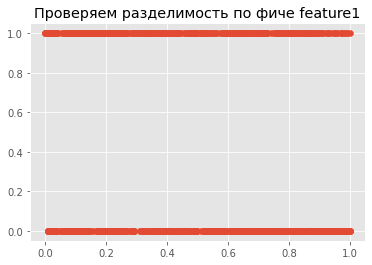

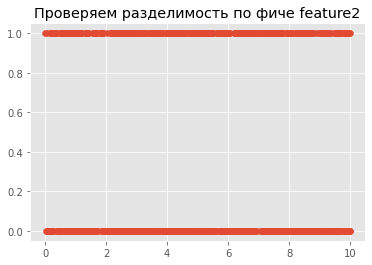

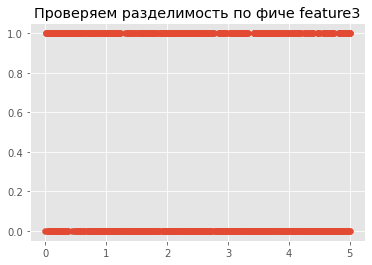

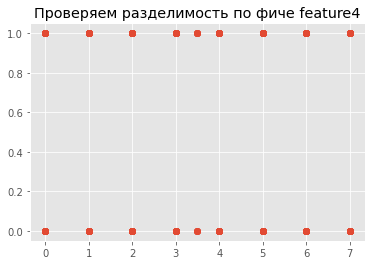

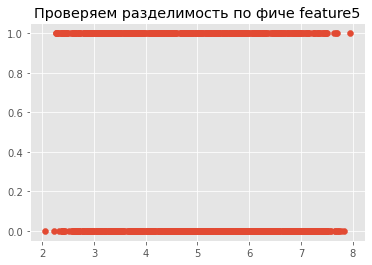

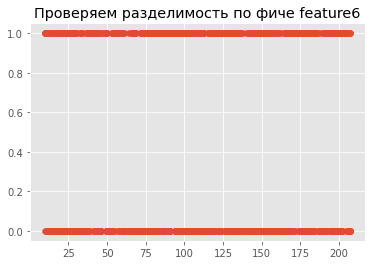

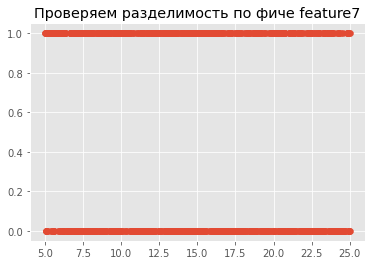

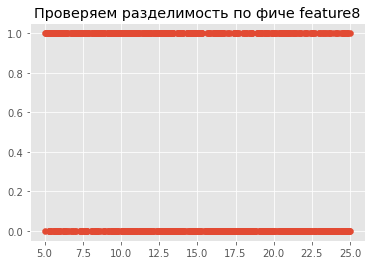

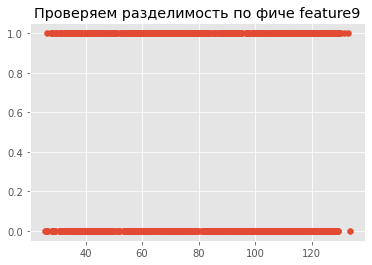

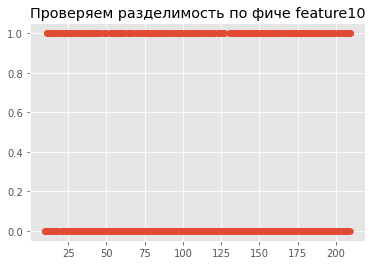

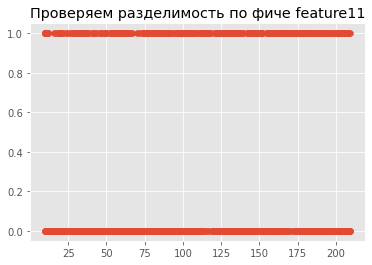

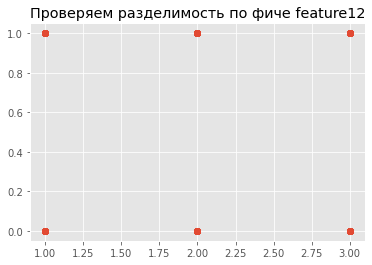

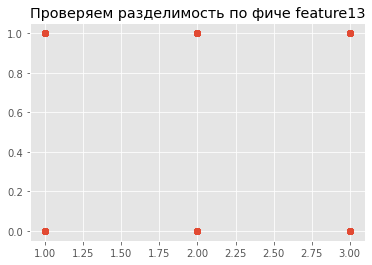

In [227]:
for column in X.columns:
    plt.title(f'Проверяем разделимость по фиче {column}')
    plt.scatter(X[column], y)
    plt.show()

Разделимости не наблюдаем, зато наблюдаем разные типы фичей, например, feature4 явно отличается по типу от остальных (на гистограме тоже было видно)

Попробуем заполнить пропуски: изначально я попробовал заполнить самым частым значением, потом средним, потом ffill

По итогу остановился на mean (результаты были чуть лучше при использовании моих методов, поэтому приведу этот метод)

In [159]:
X = X.fillna(X.mean())

In [160]:
X.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.495341,5.087420,2.462108,3.483640,4.979074,111.125420,14.742180,14.862880,80.506380,112.374000,109.954000,1.703000,2.105000
std,0.288933,2.834132,1.449427,2.271871,1.467333,55.109028,5.720165,5.843719,29.346648,57.286612,58.673883,0.785753,0.711675
min,0.000000,0.000000,0.000000,0.000000,2.060000,10.000000,5.040000,5.050000,25.770000,10.000000,10.000000,1.000000,1.000000
25%,0.240000,2.665000,1.180000,1.000000,3.697500,69.000000,9.577500,9.775000,55.602500,65.000000,60.000000,1.000000,2.000000
50%,0.495341,5.130000,2.462108,3.483640,4.979074,111.125420,14.825000,14.760000,81.915000,113.000000,109.000000,1.000000,2.000000
75%,0.740000,7.510000,3.642500,5.000000,6.202500,155.000000,19.572500,19.990000,105.987500,162.000000,161.000000,2.000000,3.000000
max,1.000000,9.990000,5.000000,7.000000,7.940000,207.000000,24.990000,24.970000,133.440000,209.000000,209.000000,3.000000,3.000000


Теперь начнем выбирать модель

## Выбор модели

Для начала я сделал самый простой перебор - выбрал несколько популярных моделей, для каждой задал небольшую сетку, а дальше устроил перебор

Топ-1 модель уже можно оптимизировать дальше

In [ ]:
!pip3 install sklearn

Функция для локального тестирования

In [148]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

def eval_classifier(clf):
    cv = RepeatedStratifiedKFold(
        n_splits=5,
        n_repeats=3,
        random_state=43)
    
    n_scores = cross_val_score(
        clf, 
        X.values, 
        y.values, 
        scoring='accuracy', 
        cv=cv, 
        n_jobs=-1, 
        error_score='raise')

    return np.mean(n_scores), np.std(n_scores)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
simplefilter("ignore", category=ConvergenceWarning)

In [93]:
models = [
    { "estimator": RandomForestClassifier(),
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [80, 85, 90, 95, 100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [80, 90, 100],
      "random_state": [239]
      }
    },
    { "estimator": svm.SVC(probability=True),
      "params": {
          'C': [0.1, 1, 10], 'gamma': [1, 0.1]
      }
    },
    { "estimator": KNeighborsClassifier(),
      "params": {
          "n_neighbors": [5, 10, 30, 45],
          "weights": ['uniform','distance'],
          "leaf_size": [2, 10, 20, 30,],
          "p": [1, 3, 5, 10]
        }
    },
    { "estimator": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None, 90, 95, 100],
          "max_features": [None, "auto", "sqrt", "log2"],
          "random_state": [43]
      }
    }
]

entries = []

highest_acc = 0
best = None

In [97]:
column_names = ["RandomForestClassifier", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
for model in tqdm(models):
    clf = model["estimator"]

    best_model = GridSearchCV(
        estimator=clf, 
        param_grid=model["params"],
        cv=5, 
        verbose=1
    )

    mean, std = eval_classifier(
            best_model
    )
    entries.append(mean)
    if mean > highest_acc:
        highest_acc = mean
        best = best_model

In [83]:
!pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 292 kB 655 kB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [86]:
import seaborn as sns

,Estimator,Accuracy
0,RandomForestClassifier,0.876667
1,SVC,0.549000
2,KNeighborsClassifier,0.558667
3,DecisionTreeClassifier,0.837333


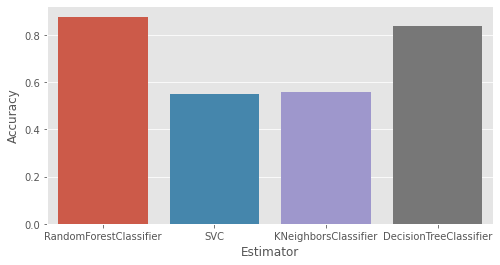

In [236]:
plt.figure(figsize=(8, 4))
df = pd.DataFrame({'Estimator': column_names, 'Accuracy': entries})
sns.barplot(x='Estimator', y='Accuracy', data=df)
display(df)

Я решил пока что заниматься RandomForest, так как он показал наилучшие результаты (до этого заслал его в контест и получил 89)

Давайте забустим его AdaBoost (до этого параметры подобрал руками + по сетке, перебор указывать тут не буду, все точно так же, как в параграфе выше)

In [161]:
from sklearn.ensemble import AdaBoostClassifier

boosted_rfc = AdaBoostClassifier(
     base_estimator=RandomForestClassifier(
         bootstrap=False,
         criterion='gini',
         max_depth=90,
         max_features='sqrt',
         n_estimators=100,
     ),
    n_estimators=1000,
    learning_rate=0.1
)

In [162]:
eval_classifier(
    boosted_rfc
)

(0.8880000000000001, 0.015033296378372923)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitti

Заслав это, я получил 90.6 - довольно неплохой результат без бустинга. Меня смущала такая разница между кросс-валидацией и результатами на лидерборде, но я не особо обратил на это внимание, что по итогу сыграло злую шутку

## Переход к бустингам

Перед тем, как перейти к бустингам, я попробовал еще несколько подходов:
* заполнял NaN через mean
* заполнял NaN через ffill
* через preprocessing делал 

```
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_scaled = sc.fit_transform(X)
```

но это тоже особо не дало результатов, хотя MinMacScaler давал небольшой выигрыш на кросс-валидации

Из бустингов попробовал XGBoost и CatBoost

In [163]:
!pip3 install xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 1.3 MB 1.2 MB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [167]:
from xgboost import XGBRFClassifier

In [172]:
xgb = XGBRFClassifier(eval_metric='logloss', use_label_encoder=False)

params = {
    'n_estimators': [20, 50, 100, 200, 300], 
    'learning_rate': [0.05, 0.1, 0.5], 
    'max_depth': [3, 5, 7, 20]
}

clf = GridSearchCV(
    xgb,
    params,
    scoring='accuracy',
    cv = 3
)

In [ ]:
eval_classifier(
    clf
)

Потом попробовал CatBoost

In [174]:
!pip3 install catboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [180]:
from catboost import CatBoostClassifier

In [199]:
import ipywidgets

In [ ]:
cat = CatBoostClassifier(loss_function='Logloss')

grid = {
    'learning_rate': [0.01, 0.1, 1],
    'depth': [2, 4, 6, 10],
    'l2_leaf_reg': [None, 0.1, 1],
    'iterations': [100, 300, 400, 500]
}

best_catboost = cat.grid_search(
    grid,
    X=X,
    y=y,
    verbose=False,
    plot=False,
)

In [208]:
best_catboost['params']

{'depth': 4, 'l2_leaf_reg': 1, 'iterations': 400, 'learning_rate': 0.1}

In [212]:
score, _ = eval_classifier(
    CatBoostClassifier(
        loss_function='Logloss',
        depth=4,
        l2_leaf_reg=1,
        iterations=400,
        learning_rate=0.1
    )
)

In [213]:
score

0.9079999999999999

Видим accuracy примерно 91%
Эта посылка дала мне на лидерборде 91.4

Все дальнейшие посылки были попыткой оптимизировать CatBoost, так как я решил, что если самая базовая модель обходит предыдущие опции, то стоит ее использовать и пытаться улучшать дальше

В итоге играясь с сеткой, заполнением NaN я получил 94.6 на закрытом лидерборде

Но в итоге упал на 17 мест и получил 91.4% -- то есть как раз около результата на кросс-валидации

## Пример того, как я получал ответ

In [218]:
test = pd.read_csv('test.csv', sep=',')
X_pred = test.drop(columns=['Id'])
X_pred.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,0.42,8.27,0.35,1.0,4.57,22.0,20.74,5.25,39.23,25,39,2,1
1,0.65,4.13,2.84,6.0,5.71,149.0,15.86,9.32,102.48,84,150,2,1
2,0.44,1.95,1.08,3.0,4.78,95.0,14.55,19.81,74.24,206,64,1,2
3,0.71,1.31,2.51,7.0,5.58,158.0,23.06,8.44,103.27,209,162,2,2
4,0.38,5.66,3.85,NaN,4.73,91.0,13.90,7.74,66.64,124,44,2,3


In [222]:
X_pred = X_pred.fillna(X_pred.mean())
X_pred.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.503186,4.857480,2.466104,3.581466,5.016081,109.372657,14.691230,15.139070,79.562440,109.189000,108.422000,1.664000,2.081000
std,0.288511,2.891898,1.408450,2.287841,1.464029,54.334762,5.686591,5.789134,28.270377,57.644533,57.442001,0.756092,0.693484
min,0.010000,0.000000,0.010000,0.000000,2.110000,10.000000,5.020000,5.010000,25.060000,10.000000,10.000000,1.000000,1.000000
25%,0.250000,2.330000,1.287500,2.000000,3.790000,65.000000,9.937500,10.225000,55.790000,60.750000,58.750000,1.000000,2.000000
50%,0.506593,4.795000,2.466104,4.000000,5.016081,109.372657,14.605000,15.195000,79.940000,109.000000,108.000000,1.000000,2.000000
75%,0.750000,7.260000,3.660000,6.000000,6.242500,155.000000,19.640000,20.195000,104.242500,157.250000,158.000000,2.000000,3.000000
max,1.000000,10.000000,5.000000,7.000000,7.960000,207.000000,24.910000,24.970000,133.000000,209.000000,209.000000,3.000000,3.000000


In [224]:
sample = pd.read_csv('./sample.csv', sep=',')
sample['target'] = cat.predict(X_pred)
sample.head()

,target,Id
0,1,0
1,0,1
2,0,2
3,0,3
4,1,4


In [ ]:
sample.to_csv('sample_ans.csv', index=False)

## Хотел попробовать, но не успел

* Хотел взять несколько хороших моделей и сделать по ним голосовалку, но так как было 2 посылки в день, то когда я садился что-то делать, быстро делал посылки, а дальше надо было ждать следующего дня (который часто был занят :()
* Хотел поскейлить фичи побольше -- поприменять OneHotEncoder (я применял, но не для всех моделей), попробовать фичи 4, 12, 13 закодировать LabelEncoder. Например, я применял MinMaxScaler, как писал выше, он давал небольшой выигрыш на кросс-валидации

Но это все минорные оптимизации, а по моему мнению сначала надо получить неплохую модель, а потом уже ее оптимизировать

Хотел посмотреть на зашумленность фичей (возможно, какая-то делала предсказаниям только хуже)

## Выводы на будущее

* Стоит больше полагаться на кросс-валидацию, чем на скор на приватном лидерборде
* Финальной посылкой стоит выбрать несколько разных моделей, а не одну с разными параметрами - вряд ли между ними будет очень большая разница в точности
* Отчет лучше аккуратно писать прямо во время соревнования, потому что потом сложно собирать все вместе))


## Почему я считаю, что CatBoost подходит лучше всего

Так как мы очевидно видим на кросс-валидации выигрыш бустингов, то разумнее выбрать какой-то из них

CatBoost мне понравился довольно широкой возможностью для настройки параметров (запускал большой перебор по сетке с несколькими параметрами), поэтому среди бустингов решил выбрать его

Еще логично, что он хорошо работает на выборке, так как основан на деревьях, которые хорошо показали себя на кросс-валидации при переборе моделек (поэтому и решил бустинги использовать in the first place)